
# Завершение кода

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
current_dir = os.path.abspath(os.getcwd())

In [3]:
#Загружаем первый датасет (базальтопластик) и посмотрим на названия столбцов
df = pd.read_excel(current_dir + r"\Itog\itog.xlsx")
# сразу удаляем неинформативный столбец
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.shape

(922, 13)

Прогнозируем модуль упругости при растяжении, ГПа

In [4]:
#разбиваем на тестовую, тренировочную выборки, выделяя предикторы и целевые переменные
normalizer = Normalizer()
res = normalizer.fit_transform(df)
df_norm_n = pd.DataFrame(res, columns = df.columns)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
    df_norm_n.loc[:, df_norm_n.columns != 'Модуль упругости при растяжении, ГПа'],
    df[['Модуль упругости при растяжении, ГПа']],
       test_size = 0.3,
    random_state = 42)

In [5]:
# Проверка правильности разбивки
df_norm_n.shape[0] - x_train_2.shape[0] - x_test_2.shape[0]

0

In [6]:
x_train_2.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
481,0.000528,0.589066,0.132149,0.020997,0.006254,0.071450,0.186083,0.767682,0.073037,0.000291,0.002285,0.015563
650,0.000430,0.617300,0.232509,0.027252,0.007346,0.075579,0.081347,0.739980,0.056839,0.000308,0.001350,0.018310
483,0.000580,0.585434,0.170519,0.043402,0.007074,0.096550,0.132807,0.772505,0.041487,0.000295,0.002249,0.018929
355,0.000911,0.545896,0.306130,0.024469,0.006610,0.070488,0.159918,0.757679,0.050148,0.000000,0.001774,0.012540
850,0.000573,0.595720,0.263992,0.034166,0.007519,0.089582,0.095597,0.740762,0.086336,0.000322,0.002765,0.017180


In [7]:
y_train_2

,"Модуль упругости при растяжении, ГПа"
481,69.573625
650,80.691499
483,71.887367
355,68.314525
850,72.997468
...,...
106,74.519119
270,70.325533
860,77.995289
435,70.199234


In [8]:
y_train_2.shape

(645, 1)

In [9]:
# Функция для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке
def mean_model(y_test_2):
    return [np.mean(y_test_2) for _ in range(len(y_test_2))]
y_2_pred_mean = mean_model(y_test_2)

In [10]:
#Проверка различных моделей при стандартных параметрах
# Метод опорных векторов - 1 

In [11]:
svr2 = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C = 500.0, epsilon = 1.0))
#обучаем модель
svr2.fit(x_train_2, np.ravel(y_train_2))
#вычисляем коэффициент детерминации
y_pred_svr2 = svr2.predict(x_test_2)
mae_svr2 = mean_absolute_error(y_pred_svr2, y_test_2)
mse_svr_elast2 = mean_squared_error(y_test_2,y_pred_svr2)
print('Support Vector Regression Results Train:') 
print("Test score: {:.2f}".format(svr2.score(x_train_2, y_train_2))) # Скор для тренировочной выборки
print('Support Vector Regression Results:')
print('SVR_MAE:', round(mean_absolute_error(y_test_2, y_pred_svr2)))
print('SVR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_svr2)))
print('SVR_MSE: {:.2f}'.format(mse_svr_elast2))
print("SVR_RMSE: {:.2f}".format (np.sqrt(mse_svr_elast2)))
print("Test score: {:.2f}".format(svr2.score(x_test_2, y_test_2))) # Скор для тестовой выборки

Support Vector Regression Results Train:
Test score: 0.90
Support Vector Regression Results:
SVR_MAE: 3
SVR_MAPE: 0.05
SVR_MSE: 19.21
SVR_RMSE: 4.38
Test score: -0.94


In [12]:
#Результаты модели, выдающей среднее значение
mse_lin_elast2_mean = mean_squared_error(y_test_2, y_2_pred_mean)
print("MAE for mean target: ", mean_absolute_error(y_test_2, y_2_pred_mean))
print("MSE for mean target: ", mse_lin_elast2_mean)
print("RMSE for mean target: ", np.sqrt(mse_lin_elast2_mean))

MAE for mean target:  2.5784995357561793
MSE for mean target:  9.910360742106828
RMSE for mean target:  3.148072543971442


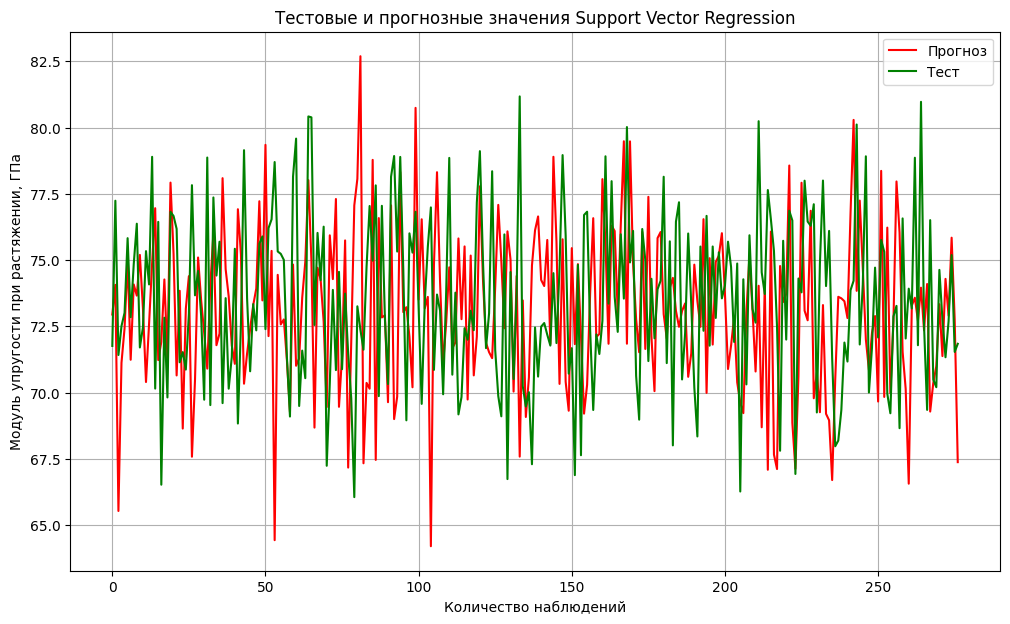

In [13]:
plt.figure(figsize = (12, 7))
plt.title("Тестовые и прогнозные значения Support Vector Regression")
plt.plot(y_pred_svr2, label = "Прогноз", color = 'red')
plt.plot(y_test_2.values, label = "Тест", color = 'green')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [14]:
# Метод случайного леса - Random Forest Regressor - 2

In [15]:
#построение модели и вузуализация метода случайный лес
rfr2 = RandomForestRegressor(n_estimators = 15,max_depth = 7, random_state = 33)
rfr2.fit(x_train_2, y_train_2.values)
y2_pred_forest = rfr2.predict(x_test_2)
mae_rfr2 = mean_absolute_error(y2_pred_forest, y_test_2)
mse_rfr_elast2 = mean_squared_error(y_test_2,y2_pred_forest)
print('Random Forest Regressor Results Train:')
print("Test score: {:.2f}".format(rfr2.score(x_train_2, y_train_2))) # Скор для тренировочной выборки
print('Random Forest Regressor Results:')
print('RF_MAE: ', round(mean_absolute_error(y_test_2, y2_pred_forest)))
print('RF_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y2_pred_forest)))
print('RF_MSE: {:.2f}'.format(mse_rfr_elast2))
print("RF_RMSE: {:.2f}".format (np.sqrt(mse_rfr_elast2)))
print("Test score: {:.2f}".format(rfr2.score(x_test_2, y_test_2))) # Скор для тестовой выборки

Random Forest Regressor Results Train:
Test score: 0.43
Random Forest Regressor Results:
RF_MAE:  3
RF_MAPE: 0.04
RF_MSE: 10.26
RF_RMSE: 3.20
Test score: -0.04


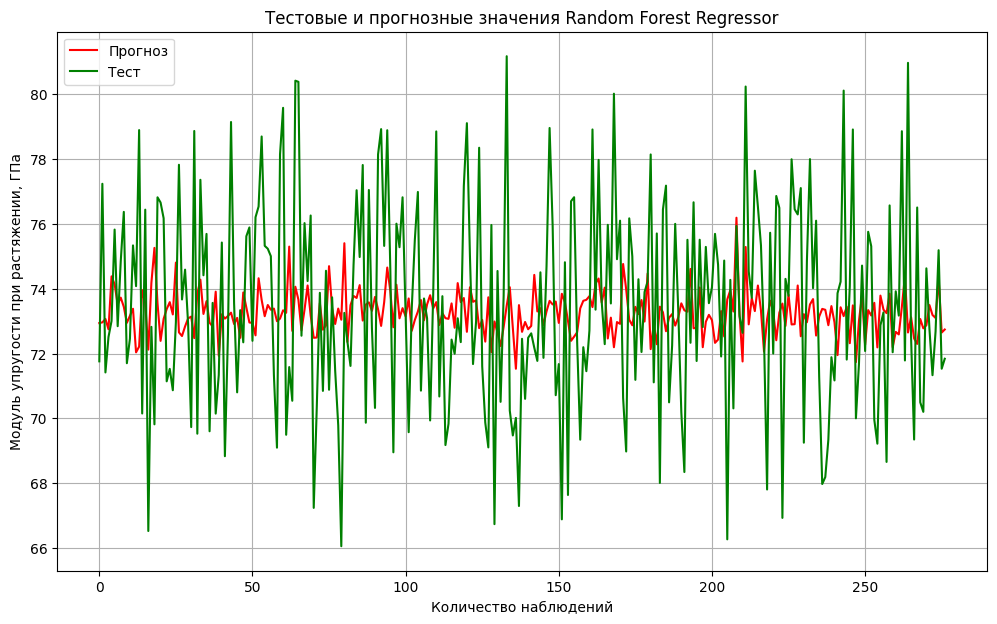

In [16]:
plt.figure(figsize=(12, 7))
plt.title("Тестовые и прогнозные значения Random Forest Regressor")
plt.plot(y2_pred_forest, label = "Прогноз", color = 'red')
plt.plot(y_test_2.values, label = "Тест", color = 'green')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [17]:
#Метод линейной регрессии - Linear Regression - 3

In [18]:
#построение модели и вузуализация Линейной регрессии
lr2 = LinearRegression()
lr2.fit(x_train_2, y_train_2)
y_pred_lr2 = lr2.predict(x_test_2)
mae_lr2 = mean_absolute_error(y_pred_lr2, y_test_2)
mse_lin_elast2 = mean_squared_error(y_test_2, y_pred_lr2)
print('Linear Regression Results Train:') # Скор для тренировочной выборки
print("Test score: {:.2f}".format(lr2.score(x_train_2, y_train_2)))
print('Linear Regression Results:')    
print('lr_MAE: ', round(mean_absolute_error(y_test_2, y_pred_lr2)))
print('lr_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_lr2)))
print('lr_MSE: {:.2f}'.format(mse_lin_elast2))
print("lr_RMSE: {:.2f}".format (np.sqrt(mse_lin_elast2)))
print("Test score: {:.2f}".format(lr2.score(x_test_2, y_test_2))) # Скор для тестовой выборки

Linear Regression Results Train:
Test score: 0.02
Linear Regression Results:
lr_MAE:  3
lr_MAPE: 0.04
lr_MSE: 10.16
lr_RMSE: 3.19
Test score: -0.03


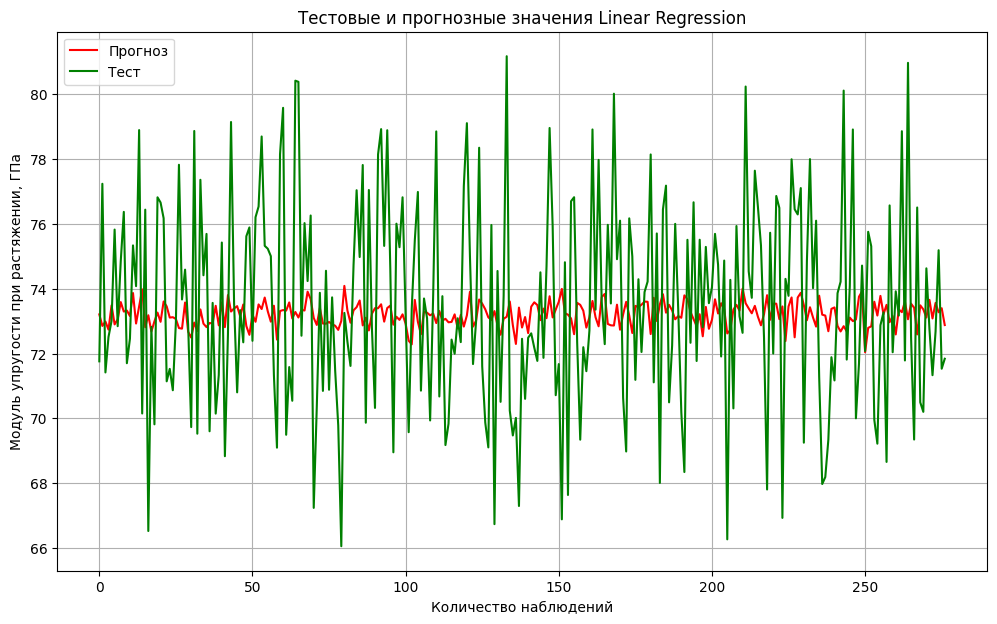

In [19]:
plt.figure(figsize = (12, 7))
plt.title("Тестовые и прогнозные значения Linear Regression")
plt.plot(y_pred_lr2, label = "Прогноз", color = 'red')
plt.plot(y_test_2.values, label = "Тест", color = 'green')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

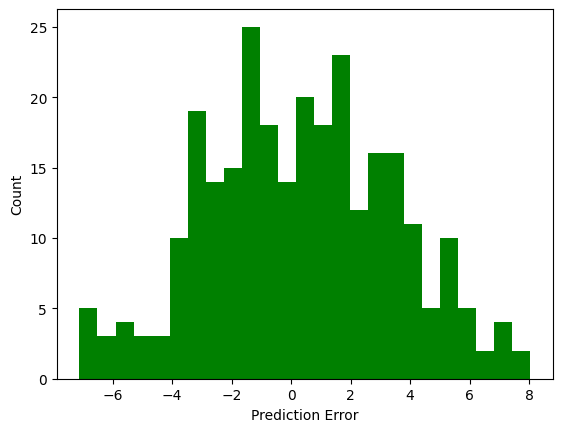

In [20]:
error = y_test_2 - y_pred_lr2
plt.hist(error, bins = 25, color = "g")
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [21]:
gbr2 = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gbr2.fit(x_train_2, np.ravel(y_train_2))
y_pred_gbr2 = gbr2.predict(x_test_2)
mae_gbr2 = mean_absolute_error(y_pred_gbr2, y_test_2)
mse_gbr_elast2 = mean_squared_error(y_test_2,y_pred_gbr2)
print('Gradient Boosting Regressor Results Train:')
print("Test score: {:.2f}".format(gbr2.score(x_train_2, y_train_2))) # Скор для тренировочной выборки
print('Gradient Boosting Regressor Results:')
print('GBR_MAE: ', round(mean_absolute_error(y_test_2, y_pred_gbr2)))
print('GBR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_gbr2)))
print('GBR_MSE: {:.2f}'.format(mse_gbr_elast2))
print("GBR_RMSE: {:.2f}".format (np.sqrt(mse_gbr_elast2)))
print("Test score: {:.2f}".format(gbr2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

Gradient Boosting Regressor Results Train:
Test score: 0.52
Gradient Boosting Regressor Results:
GBR_MAE:  3
GBR_MAPE: 0.04
GBR_MSE: 11.09
GBR_RMSE: 3.33
Test score: -0.12


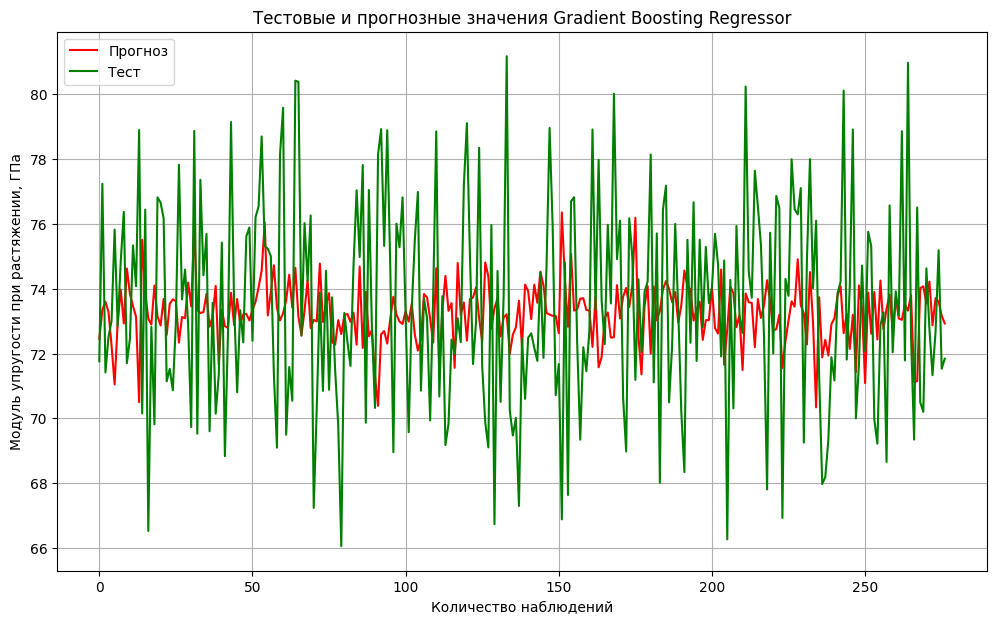

In [22]:
plt.figure(figsize = (12, 7))
plt.title("Тестовые и прогнозные значения Gradient Boosting Regressor")
plt.plot(y_pred_gbr2, label = "Прогноз", color = 'red')
plt.plot(y_test_2.values, label = "Тест", color = 'green')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [23]:
# Метод К ближайших соседей - K Neighbors Regressor - 5
knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(x_train_2, y_train_2)
y_pred_knn2 = knn2.predict(x_test_2)
mae_knr2 = mean_absolute_error(y_pred_knn2, y_test_2)
mse_knn_elast2 = mean_squared_error(y_test_2,y_pred_knn2)
print('K Neighbors Regressor  Results Train:')
print("Test score: {:.2f}".format(knn2.score(x_train_2, y_train_2)))# Скор для тренировочной выборки
print('K Neighbors Regressor  Results:')
print('KNN_MAE: ', round(mean_absolute_error(y_test_2, y_pred_knn2)))
print('KNN_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_knn2)))
print('KNN_MSE: {:.2f}'.format(mse_knn_elast2))
print("KNN_RMSE: {:.2f}".format (np.sqrt(mse_knn_elast2)))
print("Test score: {:.2f}".format(knn2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

K Neighbors Regressor  Results Train:
Test score: 0.16
K Neighbors Regressor  Results:
KNN_MAE:  3
KNN_MAPE: 0.04
KNN_MSE: 11.57
KNN_RMSE: 3.40
Test score: -0.17


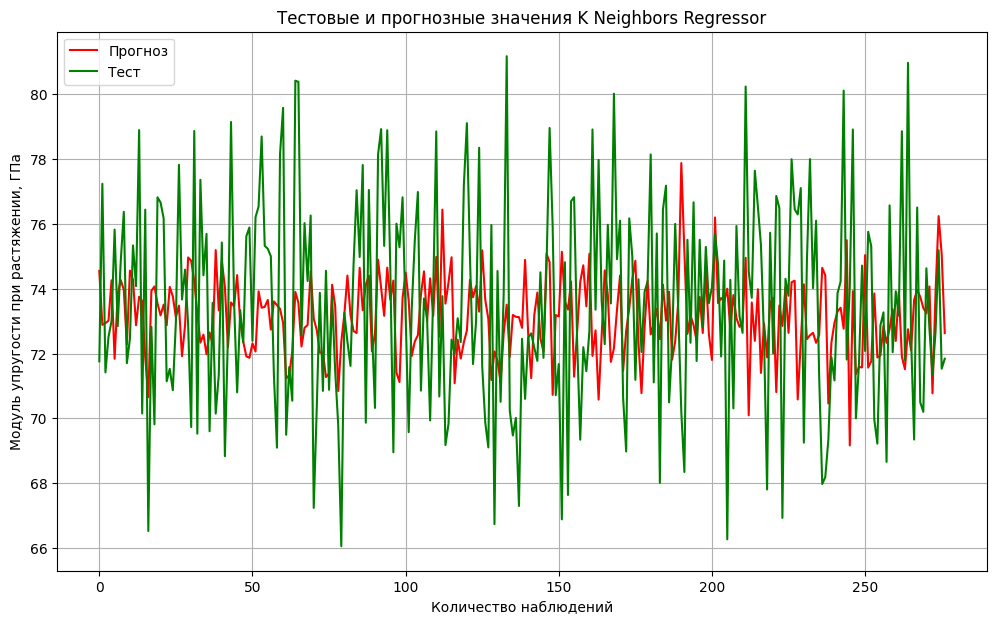

In [24]:
plt.figure(figsize = (12, 7))
plt.title("Тестовые и прогнозные значения K Neighbors Regressor")
plt.plot(y_pred_knn2, label = "Прогноз", color = 'red')
plt.plot(y_test_2.values, label = "Тест", color = 'green')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

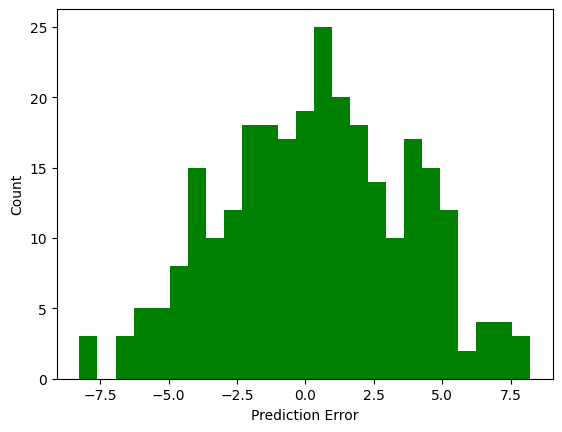

In [25]:
#Визуализация гистограммы распределения ошибки
error = y_test_2 - y_pred_knn2
plt.hist(error, bins = 25, color = "g")
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [26]:
#Деревья решений - Decision Tree Regressor - 6

dtr2 = DecisionTreeRegressor()
dtr2.fit(x_train_2, y_train_2.values)
y_pred_dtr2 = dtr2.predict(x_test_2)
mae_dtr2 = mean_absolute_error(y_pred_dtr2, y_test_2)
mse_dtr_elast2 = mean_squared_error(y_test_2,y_pred_dtr2)
print('Decision Tree Regressor Results Train:')
print("Test score: {:.2f}".format(dtr2.score(x_train_2, y_train_2)))# Скор для тренировочной выборки
print('Decision Tree Regressor Results:')
print('DTR_MAE: ', round(mean_absolute_error(y_test_2, y_pred_dtr2)))
print('DTR_MSE: {:.2f}'.format(mse_dtr_elast2))
print("DTR_RMSE: {:.2f}".format (np.sqrt(mse_dtr_elast2)))
print('DTR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_dtr2)))
print("Test score: {:.2f}".format(dtr2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

Decision Tree Regressor Results Train:
Test score: 1.00
Decision Tree Regressor Results:
DTR_MAE:  4
DTR_MSE: 21.43
DTR_RMSE: 4.63
DTR_MAPE: 0.05
Test score: -1.16


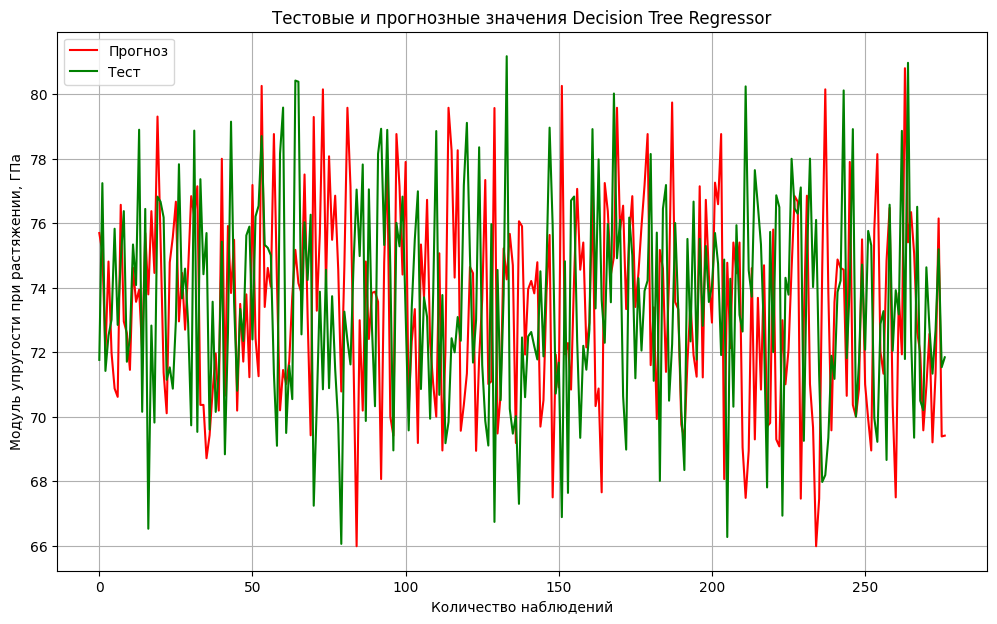

In [27]:
plt.figure(figsize = (12, 7))
plt.title("Тестовые и прогнозные значения Decision Tree Regressor")
plt.plot(y_pred_dtr2, label = "Прогноз", color = 'red')
plt.plot(y_test_2.values, label = "Тест", color = 'green')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [28]:
# Стохастический градиентный спуск (SGD) - Stochastic Gradient Descent Regressor - 7 

sdg2 = SGDRegressor()
sdg2.fit(x_train_2, y_train_2)
y_pred_sdg2 = sdg2.predict(x_test_2)
mae_sdg2 = mean_absolute_error(y_pred_sdg2, y_test_2)
mse_sdg_elast2 = mean_squared_error(y_test_2,y_pred_sdg2)
print('Stochastic Gradient Descent Regressor Results Train:')
print("Test score: {:.2f}".format(sdg2.score(x_train_2, y_train_2)))# Скор для тренировочной выборки
print('Stochastic Gradient Descent Regressor Results:')
print('SGD_MAE: ', round(mean_absolute_error(y_test_2, y_pred_sdg2)))
print('SGD_MSE: {:.2f}'.format(mse_sdg_elast2))
print("SGD_RMSE: {:.2f}".format (np.sqrt(mse_sdg_elast2)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_sdg2)))
print("Test score: {:.2f}".format(sdg2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

Stochastic Gradient Descent Regressor Results Train:
Test score: -0.02
Stochastic Gradient Descent Regressor Results:
SGD_MAE:  3
SGD_MSE: 10.29
SGD_RMSE: 3.21
SGD_MAPE: 0.04
Test score: -0.04


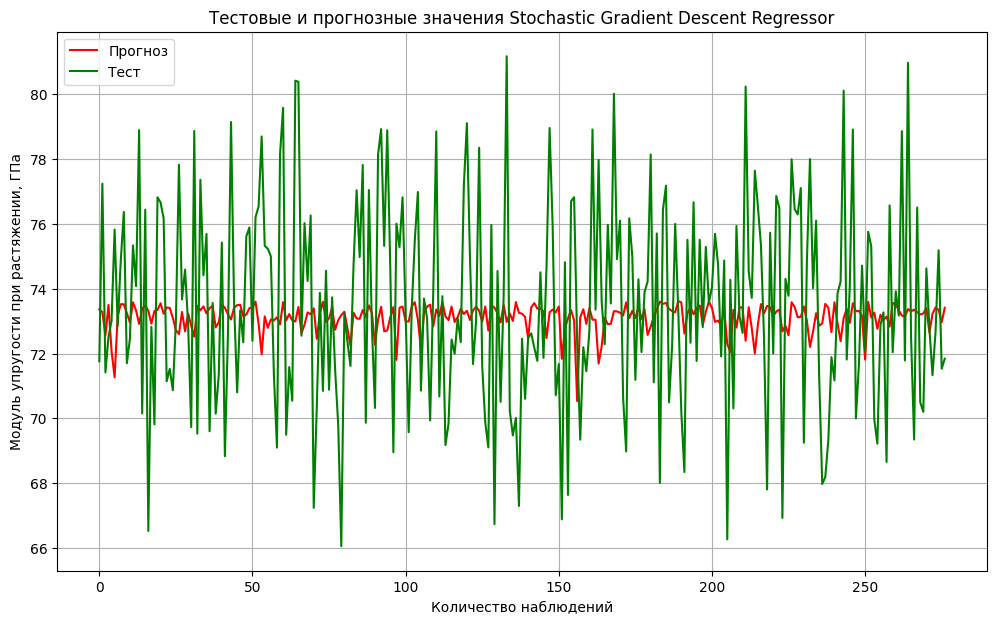

In [29]:
plt.figure(figsize = (12, 7))
plt.title("Тестовые и прогнозные значения Stochastic Gradient Descent Regressor")
plt.plot(y_pred_sdg2, label = "Прогноз", color = 'red')
plt.plot(y_test_2.values, label = "Тест", color = 'green')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [30]:
# Многослойный перцептрон - Multi-layer Perceptron regressor - 8

mlp2 = MLPRegressor(random_state = 1, max_iter = 500)
mlp2.fit(x_train_2, y_train_2)
y_pred_mlp2 = mlp2.predict(x_test_2)
mae_mlp2 = mean_absolute_error(y_pred_mlp2, y_test_2)
mse_mlp_elast2 = mean_squared_error(y_test_2,y_pred_mlp2)
print('Multi-layer Perceptron regressor Results Train:')
print("Test score: {:.2f}".format(mlp2.score(x_train_2, y_train_2)))# Скор для тренировочной выборки
print('Multi-layer Perceptron regressor Results:')
print('SGD_MAE: ', round(mean_absolute_error(y_test_2, y_pred_mlp2)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_mlp2)))
print('SGD_MSE: {:.2f}'.format(mse_mlp_elast2))
print("SGD_RMSE: {:.2f}".format (np.sqrt(mse_mlp_elast2)))
print("Test score: {:.2f}".format(mlp2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

Multi-layer Perceptron regressor Results Train:
Test score: -0.38
Multi-layer Perceptron regressor Results:
SGD_MAE:  3
SGD_MAPE: 0.04
SGD_MSE: 14.03
SGD_RMSE: 3.75
Test score: -0.42


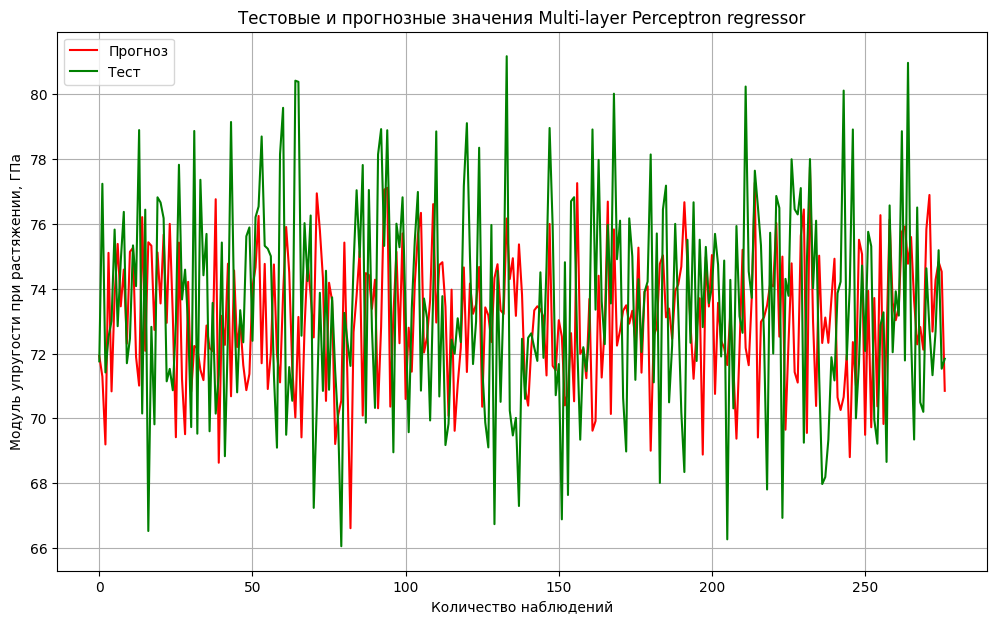

In [31]:
plt.figure(figsize = (12, 7))
plt.title("Тестовые и прогнозные значения Multi-layer Perceptron regressor")
plt.plot(y_pred_mlp2, label = "Прогноз", color = 'red')
plt.plot(y_test_2.values, label = "Тест", color = 'green')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [32]:
# Лассо регрессия - the Lasso - 9

clf2 = linear_model.Lasso(alpha = 0.1)
clf2.fit(x_train_2, y_train_2)
y_pred_clf2 = clf2.predict(x_test_2)
mae_clf2 = mean_absolute_error(y_pred_clf2, y_test_2)
mse_clf_elast2 = mean_squared_error(y_test_2,y_pred_clf2)
print('Lasso regressor Results Train:')
print("Test score: {:.2f}".format(clf2.score(x_train_2, y_train_2)))# Скор для тренировочной выборки
print('Lasso regressor Results:')
print('SGD_MAE: ', round(mean_absolute_error(y_test_2, y_pred_clf2)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_clf2)))
print('SGD_MSE: {:.2f}'.format(mse_clf_elast2))
print("SGD_RMSE: {:.2f}".format (np.sqrt(mse_clf_elast2)))
print("Test score: {:.2f}".format(clf2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

Lasso regressor Results Train:
Test score: 0.00
Lasso regressor Results:
SGD_MAE:  3
SGD_MAPE: 0.04
SGD_MSE: 10.00
SGD_RMSE: 3.16
Test score: -0.01


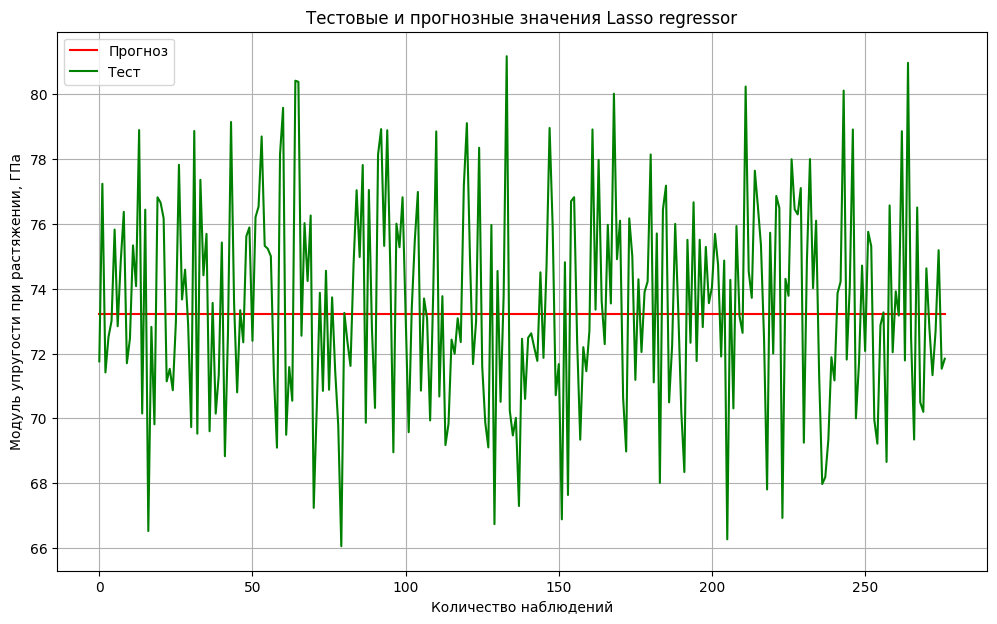

In [33]:
plt.figure(figsize = (12, 7))
plt.title("Тестовые и прогнозные значения Lasso regressor")
plt.plot(y_pred_clf2, label = "Прогноз", color = 'red')
plt.plot(y_test_2.values, label = "Тест", color = 'green')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [34]:
#сравним наши модели по метрике МАЕ
mae_df2 = {'Регрессор': ['Support Vector', 'RandomForest', 'Linear Regression', 'GradientBoosting', 'KNeighbors', 'DecisionTree', 'SGD', 'MLP', 'Lasso'], 'MAE': [mae_svr2, mae_rfr2, mae_lr2, mae_gbr2, mae_knr2, mae_dtr2, mae_sdg2, mae_mlp2, mae_clf2]} 
mae_df2 = pd.DataFrame(mae_df2)
mae_df2

,Регрессор,MAE
0,Support Vector,3.447804
1,RandomForest,2.612433
2,Linear Regression,2.609341
3,GradientBoosting,2.664648
4,KNeighbors,2.773522
5,DecisionTree,3.686987
6,SGD,2.608131
7,MLP,3.018111
8,Lasso,2.580193


In [35]:
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
# модели случайного леса - Random Forest Regressor - 2

parametrs = { 'n_estimators': [200, 300],
              'max_depth': [9, 15],
              'max_features': ['auto']}
grid21 = GridSearchCV(estimator = rfr2, param_grid  = parametrs, cv=10)
grid21.fit(x_train_2, y_train_2)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=7, n_estimators=15,
                                             random_state=33),
             param_grid={'max_depth': [9, 15], 'max_features': ['auto'],
                         'n_estimators': [200, 300]})

In [36]:
grid21.best_params_

{'max_depth': 9, 'max_features': 'auto', 'n_estimators': 300}

In [37]:
#Выводим гиперпараметры для оптимальной модели
print(grid21.best_estimator_)
knr_u = grid21.best_estimator_
print(f'R2-score RFR для модуля упругости при растяжении: {knr_u.score(x_test_2, y_test_2).round(3)}')

RandomForestRegressor(max_depth=9, max_features='auto', n_estimators=300,
                      random_state=33)
R2-score RFR для модуля упругости при растяжении: -0.035


In [38]:
#подставим оптимальные гиперпараметры в нашу модель случайного леса
rfr21_grid = RandomForestRegressor(n_estimators=200,  max_depth=9)#, max_features='auto')
#Обучаем модель
rfr21_grid.fit(x_train_2, y_train_2)

predictions_rfr21_grid = rfr21_grid.predict(x_test_2)
#Оцениваем точность на тестовом наборе
mae_rfr21_grid = mean_absolute_error(predictions_rfr21_grid, y_test_2)
mae_rfr21_grid

2.603500959412209

In [39]:
new_row_in_mae_df = {'Регрессор': 'RandomForest1_GridSearchCV', 'MAE': mae_rfr21_grid} 

mae_df = mae_df2.append(new_row_in_mae_df, ignore_index = True)

In [40]:
mae_df

,Регрессор,MAE
0,Support Vector,3.447804
1,RandomForest,2.612433
2,Linear Regression,2.609341
3,GradientBoosting,2.664648
4,KNeighbors,2.773522
5,DecisionTree,3.686987
6,SGD,2.608131
7,MLP,3.018111
8,Lasso,2.580193
9,RandomForest1_GridSearchCV,2.603501


In [41]:
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
# Метода К ближайших соседей - K Neighbors Regressor - 5
knn21 = KNeighborsRegressor()
knn21_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
# Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.
gs21 = GridSearchCV(knn21, knn21_params, cv = 10, verbose = 1, n_jobs=-1, scoring = 'r2')
gs21.fit(x_train_2, y_train_2)
knn_21 = gs21.best_estimator_
gs21.best_params_

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


{'algorithm': 'auto', 'n_neighbors': 113, 'weights': 'uniform'}

In [42]:
#Выводим гиперпараметры для оптимальной модели
print(gs21.best_estimator_)
gs121 = gs21.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {gs121.score(x_test_2, y_test_2).round(3)}')

KNeighborsRegressor(n_neighbors=113)
R2-score KNR для модуля упругости при растяжении: -0.037


In [43]:
#подставим оптимальные гиперпараметры в нашу модель метода к ближайших соседей
knn21_grid = KNeighborsRegressor(algorithm = 'brute', n_neighbors = 7, weights = 'distance')
#Обучаем модель
knn21_grid.fit(x_train_2, y_train_2)

predictions_knn21_grid = knn21_grid.predict(x_test_2)
#Оцениваем точность на тестовом наборе
mae_knn21_grid = mean_absolute_error(predictions_knn21_grid, y_test_2)
mae_knn21_grid

2.7577808199083305

In [44]:
new_row_in_mae_df = {'Регрессор': 'KNeighbors1_GridSearchCV', 'MAE': mae_knn21_grid} 

mae_df = mae_df.append(new_row_in_mae_df, ignore_index=True)
mae_df

,Регрессор,MAE
0,Support Vector,3.447804
1,RandomForest,2.612433
2,Linear Regression,2.609341
3,GradientBoosting,2.664648
4,KNeighbors,2.773522
5,DecisionTree,3.686987
6,SGD,2.608131
7,MLP,3.018111
8,Lasso,2.580193
9,RandomForest1_GridSearchCV,2.603501


In [45]:
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
#Деревья решений - Decision Tree Regressor - 6
criterion21 = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter21 = ['best', 'random']
max_depth21 = [3,5,7,9,11]
min_samples_leaf21 = [100,150,200]
min_samples_split21 = [200,250,300]
max_features21 = ['auto', 'sqrt', 'log2']
param_grid21 = {'criterion': criterion21,
               'splitter': splitter21,
               'max_depth': max_depth21,
               'min_samples_split': min_samples_split21,
               'min_samples_leaf': min_samples_leaf21,
               'max_features': max_features21}
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
# Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.
gs21 = GridSearchCV(dtr2, param_grid21, cv = 10, verbose = 1, n_jobs=-1, scoring = 'r2')
gs21.fit(x_train_2, y_train_2)
dtr_21 = gs21.best_estimator_
gs21.best_params_

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 150,
 'min_samples_split': 300,
 'splitter': 'random'}

In [46]:
#Выводим гиперпараметры для оптимальной модели
print(gs21.best_estimator_)
gs21 = gs21.best_estimator_
print(f'R2-score DTR для модуля упругости при растяжении: {gs21.score(x_test_2, y_test_2).round(3)}')

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=150,
                      min_samples_split=300, splitter='random')
R2-score DTR для модуля упругости при растяжении: -0.017


In [47]:
#подставим оптимальные гиперпараметры в нашу модель метода деревья решений
dtr21_grid = DecisionTreeRegressor(criterion='poisson', max_depth=7,#, max_features='auto',
                      min_samples_leaf=100, min_samples_split=250)
#Обучаем модель
dtr21_grid.fit(x_train_2, y_train_2)

predictions_dtr21_grid = dtr21_grid.predict(x_test_2)
#Оцениваем точность на тестовом наборе
mae_dtr21_grid = mean_absolute_error(predictions_dtr21_grid, y_test_2)
mae_dtr21_grid

2.6022301458385955

In [48]:
new_row_in_mae_df = {'Регрессор': 'DecisionTree1_GridSearchCV', 'MAE': mae_dtr21_grid} 

mae_df = mae_df.append(new_row_in_mae_df, ignore_index=True)
mae_df

,Регрессор,MAE
0,Support Vector,3.447804
1,RandomForest,2.612433
2,Linear Regression,2.609341
3,GradientBoosting,2.664648
4,KNeighbors,2.773522
5,DecisionTree,3.686987
6,SGD,2.608131
7,MLP,3.018111
8,Lasso,2.580193
9,RandomForest1_GridSearchCV,2.603501


In [49]:
pipe2 = Pipeline([('preprocessing', StandardScaler()), ('regressor', SVR())])
param_grid2 = [
{'regressor': [SVR()], 'preprocessing': [StandardScaler(), MinMaxScaler(), None],
'regressor__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
'regressor__C': [0.001, 0.01, 0.1, 1, 10, 100]},
{'regressor': [RandomForestRegressor(n_estimators=100)],
'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [LinearRegression()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [GradientBoostingRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [KNeighborsRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [DecisionTreeRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [SGDRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [MLPRegressor(random_state=1, max_iter=500)], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [linear_model.Lasso(alpha=0.1)], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},]
grid2 = GridSearchCV(pipe2, param_grid2, cv=10)
grid2.fit(x_train_2, np.ravel(y_train_2))
print("Наилучшие параметры:\n{}\n".format(grid2.best_params_))
print("Наилучшее значение правильности перекрестной проверки: {:.2f}".format(grid2.best_score_))
print("Правильность на тестовом наборе: {:.2f}".format(grid2.score(x_test_2, y_test_2)))

Наилучшие параметры:
{'preprocessing': StandardScaler(), 'regressor': SVR(C=1, gamma=1), 'regressor__C': 1, 'regressor__gamma': 1}

Наилучшее значение правильности перекрестной проверки: -0.00
Правильность на тестовом наборе: -0.01


In [50]:
print("Наилучшая модель:\n{}".format(grid2.best_estimator_))

Наилучшая модель:
Pipeline(steps=[('preprocessing', StandardScaler()),
                ('regressor', SVR(C=1, gamma=1))])


После обучения моделей была проведена оценка точности этих моделей на обучающей и тестовых выборках. В качестве параметра оценки модели использовалась средняя абсолютная ошибка (MAE). Обе модели даже на тренировочном датасете не смогли обучиться и приблизиться к исходным данным. Поэтому ошибка на тестовом датасете выше.

Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель.

In [51]:
# Сформируем входы и выход для модели

tv = df['Соотношение матрица-наполнитель']
tr_v = df.loc[:, df.columns != 'Соотношение матрица-наполнитель']

# Разбиваем выборки на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(tr_v, tv, test_size = 0.3, random_state = 14)

In [52]:
# Нормализуем данные

x_train_n = tf.keras.layers.Normalization(axis =-1)
x_train_n.adapt(np.array(x_train))

In [53]:
def create_model(lyrs=[32], act='softmax', opt='SGD', dr=0.1):
    
    seed = 7
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
    model = Sequential()
    model.add(Dense(lyrs[0], input_dim=x_train.shape[1], activation=act)) 
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    model.add(Dropout(dr))
    model.add(Dense(3, activation='tanh'))  # выходной слой
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['mae', 'accuracy'])
 
    return model

In [54]:
# строим модель
model = KerasClassifier(build_fn=create_model, verbose=0)

# определяем параметры
batch_size = [4, 10, 20, 50, 100]
epochs = [10, 50, 100, 200, 300]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# поиск оптимальных параметров
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=10,
                    verbose=1, n_jobs=4)

grid_result = grid.fit(x_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [55]:
# результаты
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.004639 using {'batch_size': 10, 'epochs': 300}
0.001538 (0.004615) with: {'batch_size': 4, 'epochs': 10}
0.001538 (0.004615) with: {'batch_size': 4, 'epochs': 50}
0.001538 (0.004615) with: {'batch_size': 4, 'epochs': 100}
0.001538 (0.004615) with: {'batch_size': 4, 'epochs': 200}
0.001538 (0.004615) with: {'batch_size': 4, 'epochs': 300}
0.000000 (0.000000) with: {'batch_size': 10, 'epochs': 10}
0.001563 (0.004688) with: {'batch_size': 10, 'epochs': 50}
0.001538 (0.004615) with: {'batch_size': 10, 'epochs': 100}
0.001538 (0.004615) with: {'batch_size': 10, 'epochs': 200}
0.004639 (0.009877) with: {'batch_size': 10, 'epochs': 300}
0.000000 (0.000000) with: {'batch_size': 20, 'epochs': 10}
0.003077 (0.009231) with: {'batch_size': 20, 'epochs': 50}
0.001538 (0.004615) with: {'batch_size': 20, 'epochs': 100}
0.001538 (0.004615) with: {'batch_size': 20, 'epochs': 200}
0.001538 (0.004615) with: {'batch_size': 20, 'epochs': 300}
0.001538 (0.004615) with: {'batch_size': 50, 'epochs': 1

In [56]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END ............................................opt=SGD; total time=   7.3s
[CV] END ............................................opt=SGD; total time=   7.2s
[CV] END ............................................opt=SGD; total time=   7.3s
[CV] END ............................................opt=SGD; total time=   7.0s
[CV] END ............................................opt=SGD; total time=   6.9s
[CV] END ............................................opt=SGD; total time=   8.1s
[CV] END ............................................opt=SGD; total time=   7.8s
[CV] END ............................................opt=SGD; total time=   8.0s
[CV] END ............................................opt=SGD; total time=   8.3s
[CV] END ............................................opt=SGD; total time=   8.4s
[CV] END ........................................opt=RMSprop; total time=   7.3s
[CV] END .......................................

In [57]:
# результаты
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.004639 using {'opt': 'Adagrad'}
0.001538 (0.004615) with: {'opt': 'SGD'}
0.001538 (0.004615) with: {'opt': 'RMSprop'}
0.004639 (0.009877) with: {'opt': 'Adagrad'}
0.003101 (0.006202) with: {'opt': 'Adadelta'}
0.001538 (0.004615) with: {'opt': 'Adam'}
0.003077 (0.009231) with: {'opt': 'Nadam'}


In [58]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)

layers = [[8],[16, 4],[32, 8, 3],[12, 6, 3], [64, 64, 3], [128, 64, 16, 3]]
param_grid = dict(lyrs=layers)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END ...........................................lyrs=[8]; total time=   7.6s
[CV] END ...........................................lyrs=[8]; total time=   7.4s
[CV] END ...........................................lyrs=[8]; total time=   7.5s
[CV] END ...........................................lyrs=[8]; total time=   7.6s
[CV] END ...........................................lyrs=[8]; total time=   7.6s
[CV] END ...........................................lyrs=[8]; total time=   7.5s
[CV] END ...........................................lyrs=[8]; total time=   8.2s
[CV] END ...........................................lyrs=[8]; total time=   7.9s
[CV] END ...........................................lyrs=[8]; total time=   7.8s
[CV] END ...........................................lyrs=[8]; total time=   8.1s
[CV] END .......................................lyrs=[16, 4]; total time=   7.4s
[CV] END .......................................

In [59]:
# результаты
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.003101 using {'lyrs': [64, 64, 3]}
0.003077 (0.009231) with: {'lyrs': [8]}
0.001538 (0.004615) with: {'lyrs': [16, 4]}
0.003077 (0.009231) with: {'lyrs': [32, 8, 3]}
0.001538 (0.004615) with: {'lyrs': [12, 6, 3]}
0.003101 (0.006202) with: {'lyrs': [64, 64, 3]}
0.001538 (0.004615) with: {'lyrs': [128, 64, 16, 3]}


In [60]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)

activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(act=activation)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result = grid.fit(x_train, y_train)

In [61]:
# результаты
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.004639 using {'act': 'softmax'}
0.004639 (0.009877) with: {'act': 'softmax'}
0.003077 (0.009231) with: {'act': 'softplus'}
0.001538 (0.004615) with: {'act': 'softsign'}
0.001538 (0.004615) with: {'act': 'relu'}
0.001538 (0.004615) with: {'act': 'tanh'}
0.001538 (0.004615) with: {'act': 'sigmoid'}
0.001538 (0.004615) with: {'act': 'hard_sigmoid'}
0.003077 (0.009231) with: {'act': 'linear'}


In [62]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)

drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
param_grid = dict(dr=drops)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV] END .............................................dr=0.0; total time=   7.0s
[CV] END .............................................dr=0.0; total time=   7.0s
[CV] END .............................................dr=0.0; total time=   7.4s
[CV] END .............................................dr=0.0; total time=   7.0s
[CV] END .............................................dr=0.0; total time=   6.8s
[CV] END .............................................dr=0.0; total time=   7.0s
[CV] END .............................................dr=0.0; total time=   7.4s
[CV] END .............................................dr=0.0; total time=   7.7s
[CV] END .............................................dr=0.0; total time=   7.7s
[CV] END .............................................dr=0.0; total time=   7.6s
[CV] END ............................................dr=0.01; total time=   7.5s
[CV] END .......................................

In [63]:
# результаты
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.003077 using {'dr': 0.3}
0.001538 (0.004615) with: {'dr': 0.0}
0.001538 (0.004615) with: {'dr': 0.01}
0.001538 (0.004615) with: {'dr': 0.05}
0.001538 (0.004615) with: {'dr': 0.1}
0.001538 (0.004615) with: {'dr': 0.2}
0.003077 (0.009231) with: {'dr': 0.3}
0.001538 (0.004615) with: {'dr': 0.5}


In [64]:
# построение окончательной модели
model = create_model(lyrs=[128, 64, 16, 3], dr=0.05)

print(model.summary())

Model: "sequential_195"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_492 (Dense)           (None, 128)               1664      
                                                                 
 dense_493 (Dense)           (None, 64)                8256      
                                                                 
 dense_494 (Dense)           (None, 16)                1040      
                                                                 
 dense_495 (Dense)           (None, 3)                 51        
                                                                 
 dropout_195 (Dropout)       (None, 3)                 0         
                                                                 
 dense_496 (Dense)           (None, 3)                 12        
                                                                 
Total params: 11,023
Trainable params: 11,023
Non-tr

In [65]:
# обучаем нейросеть, 80/20 CV
model_hist = model.fit(x_train, 
    y_train, 
    epochs = 100, 
    verbose = 1, 
    validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 1s 14ms/step - loss: 14.7466 - mae: 2.6468 - accuracy: 0.0000e+00 - val_loss: 12.4933 - val_mae: 2.3571 - val_accuracy: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 12.7229 - mae: 2.5330 - accuracy: 0.0000e+00 - val_loss: 11.4402 - val_mae: 2.3029 - val_accuracy: 0.0000e+00
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 11.6898 - mae: 2.4957 - accuracy: 0.0000e+00 - val_loss: 10.5343 - val_mae: 2.2814 - val_accuracy: 0.0000e+00
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 10.6831 - mae: 2.4809 - accuracy: 0.0000e+00 - val_loss: 9.6668 - val_mae: 2.2724 - val_accuracy: 0.0000e+00
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 9.7420 - mae: 2.4760 - accuracy: 0.0000e+00 - val_loss: 8.8209 - val_mae: 2.2706 - val_accuracy: 0.0000e+00
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 8.7926 - mae: 

17/17 [==============================] - 0s 3ms/step - loss: -29.4548 - mae: 1.9852 - accuracy: 0.0000e+00 - val_loss: -26.7941 - val_mae: 1.7795 - val_accuracy: 0.0000e+00
Epoch 46/100
17/17 [==============================] - 0s 4ms/step - loss: -29.6353 - mae: 1.9852 - accuracy: 0.0000e+00 - val_loss: -26.9234 - val_mae: 1.7795 - val_accuracy: 0.0000e+00
Epoch 47/100
17/17 [==============================] - 0s 3ms/step - loss: -29.5493 - mae: 1.9852 - accuracy: 0.0000e+00 - val_loss: -26.8866 - val_mae: 1.7795 - val_accuracy: 0.0000e+00
Epoch 48/100
17/17 [==============================] - 0s 4ms/step - loss: -29.7406 - mae: 1.9852 - accuracy: 0.0000e+00 - val_loss: -27.1246 - val_mae: 1.7795 - val_accuracy: 0.0000e+00
Epoch 49/100
17/17 [==============================] - 0s 4ms/step - loss: -29.3919 - mae: 1.9852 - accuracy: 0.0000e+00 - val_loss: -27.1246 - val_mae: 1.7795 - val_accuracy: 0.0000e+00
Epoch 50/100
17/17 [==============================] - 0s 4ms/step - loss: -29.6107 

17/17 [==============================] - 0s 3ms/step - loss: -29.6651 - mae: 1.9852 - accuracy: 0.0000e+00 - val_loss: -27.1246 - val_mae: 1.7795 - val_accuracy: 0.0000e+00
Epoch 90/100
17/17 [==============================] - 0s 3ms/step - loss: -29.7852 - mae: 1.9852 - accuracy: 0.0000e+00 - val_loss: -27.1246 - val_mae: 1.7795 - val_accuracy: 0.0000e+00
Epoch 91/100
17/17 [==============================] - 0s 3ms/step - loss: -29.5164 - mae: 1.9852 - accuracy: 0.0000e+00 - val_loss: -27.1246 - val_mae: 1.7795 - val_accuracy: 0.0000e+00
Epoch 92/100
17/17 [==============================] - 0s 4ms/step - loss: -29.8220 - mae: 1.9852 - accuracy: 0.0000e+00 - val_loss: -27.1246 - val_mae: 1.7795 - val_accuracy: 0.0000e+00
Epoch 93/100
17/17 [==============================] - 0s 3ms/step - loss: -29.5431 - mae: 1.9852 - accuracy: 0.0000e+00 - val_loss: -27.1246 - val_mae: 1.7795 - val_accuracy: 0.0000e+00
Epoch 94/100
17/17 [==============================] - 0s 4ms/step - loss: -29.6215 

In [66]:
# оценим модель
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

9/9 [==============================] - 0s 2ms/step - loss: -28.9481 - mae: 1.9057 - accuracy: 0.0000e+00

mae: 190.57%


In [67]:
# Посмотрим на потери модели

model_hist.history

{'loss': [14.746562957763672,
  12.722900390625,
  11.68978500366211,
  10.683135032653809,
  9.74197006225586,
  8.792555809020996,
  7.858016014099121,
  6.902551174163818,
  5.968310356140137,
  4.906774520874023,
  4.006844997406006,
  2.901571273803711,
  1.7531942129135132,
  0.8638630509376526,
  -0.2772042453289032,
  -2.4280436038970947,
  -18.373716354370117,
  -19.98762321472168,
  -21.576927185058594,
  -22.27556610107422,
  -22.895797729492188,
  -23.43739891052246,
  -24.001094818115234,
  -24.723243713378906,
  -25.171260833740234,
  -25.719797134399414,
  -26.310791015625,
  -26.925037384033203,
  -27.44440460205078,
  -27.877676010131836,
  -28.4683780670166,
  -28.95655632019043,
  -29.145301818847656,
  -29.735286712646484,
  -29.612890243530273,
  -29.91121482849121,
  -29.61032485961914,
  -29.580991744995117,
  -29.72833251953125,
  -29.66795539855957,
  -29.748329162597656,
  -29.564401626586914,
  -29.538949966430664,
  -29.763587951660156,
  -29.454757690429688

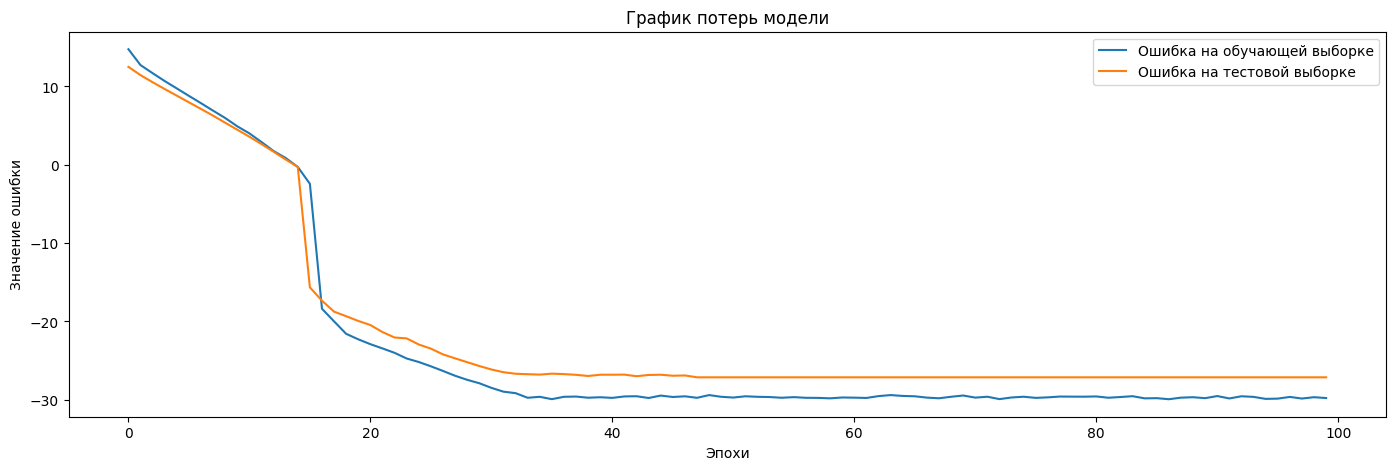

In [68]:
# Посмотрим на график потерь на тренировочной и тестовой выборках
def model_loss_plot(model_hist):
    plt.figure(figsize = (17,5))
    plt.plot(model_hist.history['loss'],
             label = 'ошибка на обучающей выборке')
    plt.plot(model_hist.history['val_loss'],
            label = 'ошибка на тестовой выборке')
    plt.title('График потерь модели')
    plt.ylabel('Значение ошибки')
    plt.xlabel('Эпохи')
    plt.legend(['Oшибка на обучающей выборке', 'Ошибка на тестовой выборке'], loc='best')
    plt.show()
model_loss_plot(model_hist)

9/9 [==============================] - 0s 2ms/step


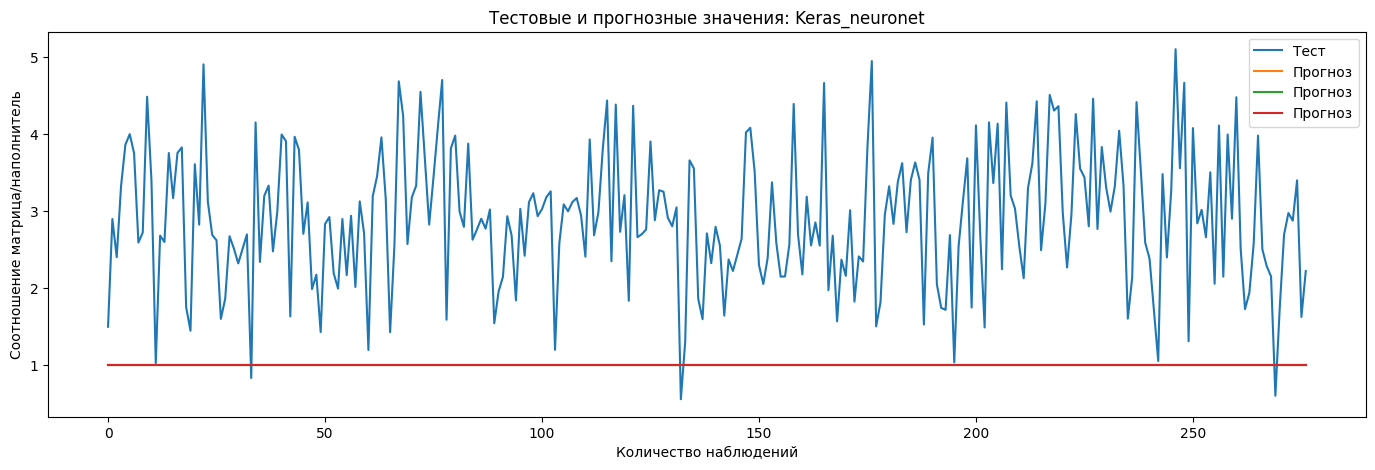

In [69]:
# Зададим функцию для визуализации факт/прогноз для результатов моделей
# Посмотрим на график результата работы модели
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, model.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'Keras_neuronet')

In [70]:
from tensorflow.keras.layers import Dense
# Сконфигурируем другую модель, зададим слои
model1 = tf.keras.Sequential([x_train_n, Dense(128, activation='relu'),  
                                                 Dense(128, activation='relu'), 
                                                 Dense(128, activation='relu'), 
                                                 Dense(64, activation='relu'),
                                                 Dense(64, activation='relu'),
                                                 Dense(32, activation='relu'), 
                                                 Dense(16, activation='relu'), 
                                                 Dense(1)
                            ])

model1.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])  
# Посмотрим на архитектуру модели

model1.summary()

Model: "sequential_196"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_497 (Dense)           (None, 128)               1664      
                                                                 
 dense_498 (Dense)           (None, 128)               16512     
                                                                 
 dense_499 (Dense)           (None, 128)               16512     
                                                                 
 dense_500 (Dense)           (None, 64)                8256      
                                                                 
 dense_501 (Dense)           (None, 64)                4160      
                                                    

In [71]:
# Обучим модель
model_hist1 = model1.fit(
    x_train, 
    y_train, 
    epochs = 100, 
    verbose = 1, 
    validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 1s 14ms/step - loss: 6.0433 - root_mean_squared_error: 2.4583 - val_loss: 2.5213 - val_root_mean_squared_error: 1.5878
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 1.4334 - root_mean_squared_error: 1.1973 - val_loss: 1.1444 - val_root_mean_squared_error: 1.0698
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 1.0350 - root_mean_squared_error: 1.0173 - val_loss: 1.0942 - val_root_mean_squared_error: 1.0461
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.9389 - root_mean_squared_error: 0.9689 - val_loss: 1.1669 - val_root_mean_squared_error: 1.0802
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.9002 - root_mean_squared_error: 0.9488 - val_loss: 1.1796 - val_root_mean_squared_error: 1.0861
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.8371 - root_mean_squared_error: 0.9149 - val_loss: 1.1499 - val_root_

Epoch 49/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0101 - root_mean_squared_error: 0.1007 - val_loss: 1.5512 - val_root_mean_squared_error: 1.2455
Epoch 50/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0090 - root_mean_squared_error: 0.0948 - val_loss: 1.5509 - val_root_mean_squared_error: 1.2453
Epoch 51/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0111 - root_mean_squared_error: 0.1053 - val_loss: 1.5929 - val_root_mean_squared_error: 1.2621
Epoch 52/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0093 - root_mean_squared_error: 0.0966 - val_loss: 1.6297 - val_root_mean_squared_error: 1.2766
Epoch 53/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0076 - root_mean_squared_error: 0.0874 - val_loss: 1.5613 - val_root_mean_squared_error: 1.2495
Epoch 54/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0049 - root_mean_squared_error: 0.0697 - val_loss: 1.5846 - val_

17/17 [==============================] - 0s 4ms/step - loss: 0.0028 - root_mean_squared_error: 0.0532 - val_loss: 1.5231 - val_root_mean_squared_error: 1.2341
Epoch 97/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0407 - val_loss: 1.5217 - val_root_mean_squared_error: 1.2336
Epoch 98/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0020 - root_mean_squared_error: 0.0449 - val_loss: 1.5393 - val_root_mean_squared_error: 1.2407
Epoch 99/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0015 - root_mean_squared_error: 0.0382 - val_loss: 1.5489 - val_root_mean_squared_error: 1.2446
Epoch 100/100
17/17 [==============================] - 0s 3ms/step - loss: 9.2070e-04 - root_mean_squared_error: 0.0303 - val_loss: 1.5279 - val_root_mean_squared_error: 1.2361


In [72]:
model1.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1.2192 - root_mean_squared_error: 1.1042


[1.219157338142395, 1.1041545867919922]

In [73]:
y_pred_model = model1.predict(x_test)

print('Model Results:')
print('Model_MAE: ', round(mean_absolute_error(y_test, y_pred_model)))
print('Model_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test, y_pred_model)))
print("Test score: {:.2f}".format(mean_squared_error(y_test, y_pred_model)))

9/9 [==============================] - 0s 2ms/step
Model Results:
Model_MAE:  1
Model_MAPE: 0.37
Test score: 1.22


In [74]:
# Посмотрим на потери модели
model_hist1.history

{'loss': [6.043303966522217,
  1.4334341287612915,
  1.0349701642990112,
  0.9388619065284729,
  0.9002466201782227,
  0.8370514512062073,
  0.7962136268615723,
  0.7958428859710693,
  0.7875575423240662,
  0.6873693466186523,
  0.6374419927597046,
  0.6213176250457764,
  0.5620344281196594,
  0.5157456994056702,
  0.4921432137489319,
  0.43255117535591125,
  0.3692052662372589,
  0.33502697944641113,
  0.31049737334251404,
  0.2523379921913147,
  0.2081802934408188,
  0.16641712188720703,
  0.15024219453334808,
  0.12874352931976318,
  0.10377448797225952,
  0.0901792049407959,
  0.09267209470272064,
  0.06797637045383453,
  0.06756821274757385,
  0.05647273361682892,
  0.04929390922188759,
  0.0639517605304718,
  0.05401279032230377,
  0.04149417206645012,
  0.0316355936229229,
  0.026696234941482544,
  0.024086201563477516,
  0.03246374800801277,
  0.022685708478093147,
  0.018359998241066933,
  0.021367421373724937,
  0.01699039340019226,
  0.015440561808645725,
  0.012321148067712

In [75]:
# Посмотрим на график потерь на тренировочной и тестовой выборках
def model_loss_plot(model_hist1):
    plt.figure(figsize = (17,5))
    plt.plot(model_hist1.history['loss'],
             label = 'ошибка на обучающей выборке')
    plt.plot(model_hist1.history['val_loss'],
            label = 'ошибка на тестовой выборке')
    plt.title('График потерь модели')
    plt.ylabel('Значение ошибки')
    plt.xlabel('Эпохи')
    plt.legend(['Oшибка на обучающей выборке', 'Ошибка на тестовой выборке'], loc='best')
    plt.show()

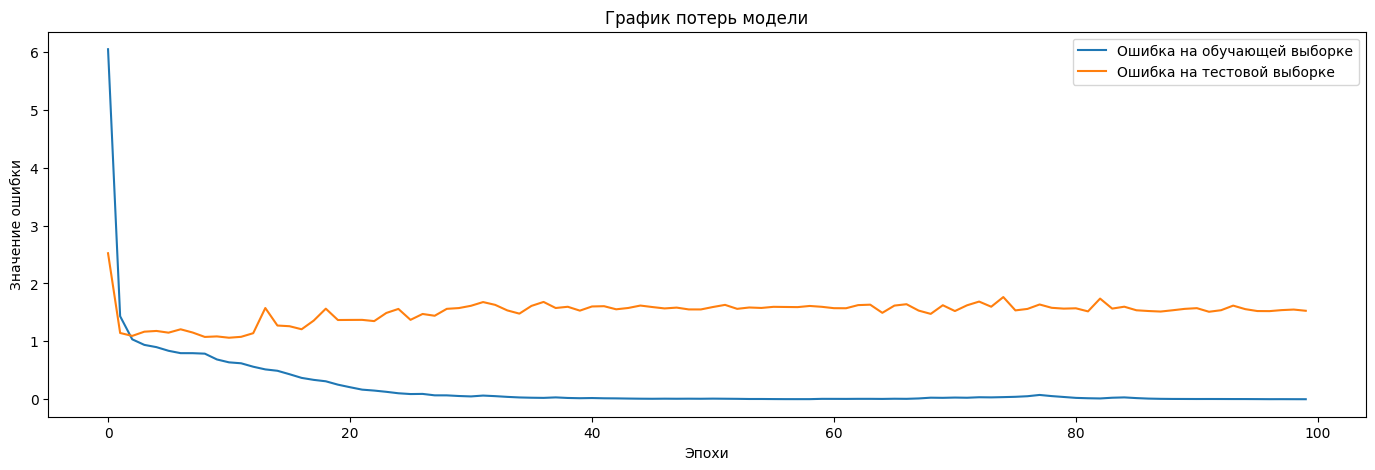

In [76]:
model_loss_plot(model_hist1)

In [77]:
# Зададим функцию для визуализации факт/прогноз для результатов моделей
# Посмотрим на график результата работы модели
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()

9/9 [==============================] - 0s 2ms/step


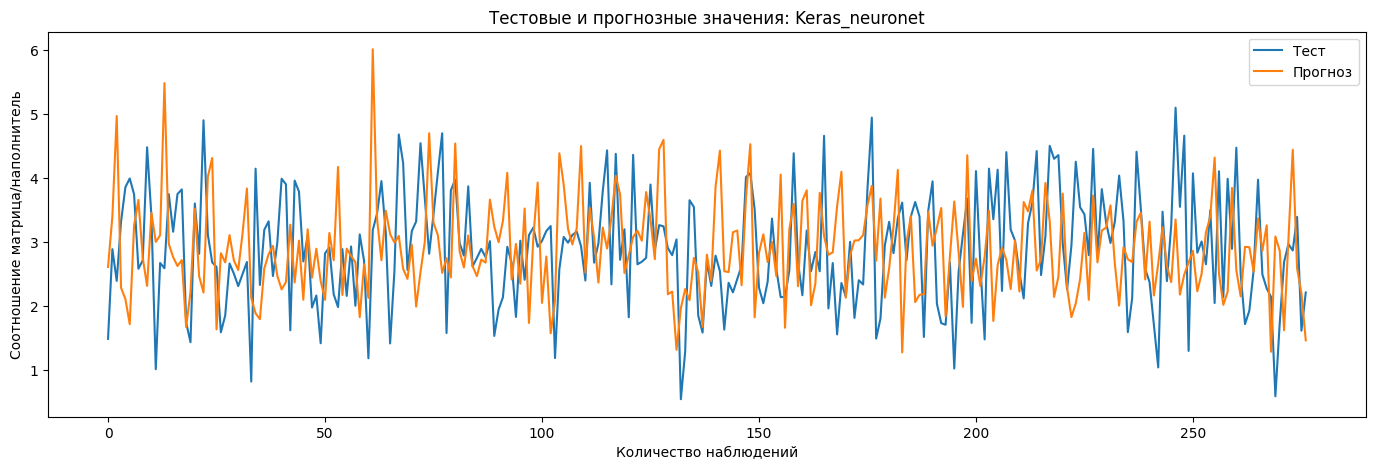

In [78]:
actual_and_predicted_plot(y_test.values, model1.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'Keras_neuronet')

In [79]:
# оценка модели MSE
model1.evaluate(x_test, y_test, verbose = 1)

9/9 [==============================] - 0s 2ms/step - loss: 1.2192 - root_mean_squared_error: 1.1042


[1.219157338142395, 1.1041545867919922]

9/9 [==============================] - 0s 2ms/step


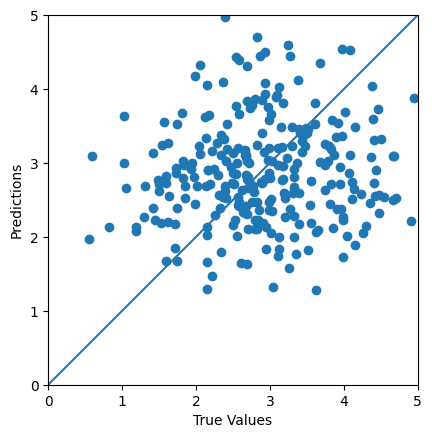

In [80]:
test_predictions = model1.predict(x_test).flatten()

a = plt.axes(aspect = 'equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Ещё одна модель

In [81]:
model2 = tf.keras.Sequential([x_train_n, Dense(20, activation='relu'),                                                            
                                         Dense(8, activation='relu'),                                          
                                         Dense(2, activation='relu'),
                                         Dropout(0.2),
                                         Dense(1)
                            ])

model2.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])  
# Посмотрим на архитектуру модели

model2.summary()

Model: "sequential_197"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_505 (Dense)           (None, 20)                260       
                                                                 
 dense_506 (Dense)           (None, 8)                 168       
                                                                 
 dense_507 (Dense)           (None, 2)                 18        
                                                                 
 dropout_196 (Dropout)       (None, 2)                 0         
                                                                 
 dense_508 (Dense)           (None, 1)                 3         
                                                    

In [82]:
# Обучим модель

model_hist2 = model2.fit(
    x_train, 
    y_train, 
    epochs = 300, 
    verbose = 1, 
    validation_split = 0.2)

Epoch 1/300
17/17 [==============================] - 1s 12ms/step - loss: 17.3496 - root_mean_squared_error: 4.1653 - val_loss: 13.8913 - val_root_mean_squared_error: 3.7271
Epoch 2/300
17/17 [==============================] - 0s 3ms/step - loss: 14.3294 - root_mean_squared_error: 3.7854 - val_loss: 11.8067 - val_root_mean_squared_error: 3.4361
Epoch 3/300
17/17 [==============================] - 0s 3ms/step - loss: 12.4660 - root_mean_squared_error: 3.5307 - val_loss: 10.4473 - val_root_mean_squared_error: 3.2322
Epoch 4/300
17/17 [==============================] - 0s 3ms/step - loss: 11.2696 - root_mean_squared_error: 3.3570 - val_loss: 9.5557 - val_root_mean_squared_error: 3.0912
Epoch 5/300
17/17 [==============================] - 0s 3ms/step - loss: 10.4593 - root_mean_squared_error: 3.2341 - val_loss: 8.9788 - val_root_mean_squared_error: 2.9965
Epoch 6/300
17/17 [==============================] - 0s 4ms/step - loss: 9.9821 - root_mean_squared_error: 3.1594 - val_loss: 8.5826 - v

17/17 [==============================] - 0s 3ms/step - loss: 5.8982 - root_mean_squared_error: 2.4286 - val_loss: 5.0259 - val_root_mean_squared_error: 2.2418
Epoch 49/300
17/17 [==============================] - 0s 3ms/step - loss: 5.8332 - root_mean_squared_error: 2.4152 - val_loss: 4.9679 - val_root_mean_squared_error: 2.2289
Epoch 50/300
17/17 [==============================] - 0s 3ms/step - loss: 5.7684 - root_mean_squared_error: 2.4018 - val_loss: 4.9080 - val_root_mean_squared_error: 2.2154
Epoch 51/300
17/17 [==============================] - 0s 3ms/step - loss: 5.7030 - root_mean_squared_error: 2.3881 - val_loss: 4.8489 - val_root_mean_squared_error: 2.2020
Epoch 52/300
17/17 [==============================] - 0s 3ms/step - loss: 5.6393 - root_mean_squared_error: 2.3747 - val_loss: 4.7918 - val_root_mean_squared_error: 2.1890
Epoch 53/300
17/17 [==============================] - 0s 3ms/step - loss: 5.5759 - root_mean_squared_error: 2.3613 - val_loss: 4.7344 - val_root_mean_squ

Epoch 96/300
17/17 [==============================] - 0s 3ms/step - loss: 3.3630 - root_mean_squared_error: 1.8338 - val_loss: 2.7680 - val_root_mean_squared_error: 1.6637
Epoch 97/300
17/17 [==============================] - 0s 3ms/step - loss: 3.3217 - root_mean_squared_error: 1.8225 - val_loss: 2.7319 - val_root_mean_squared_error: 1.6528
Epoch 98/300
17/17 [==============================] - 0s 3ms/step - loss: 3.2807 - root_mean_squared_error: 1.8113 - val_loss: 2.6967 - val_root_mean_squared_error: 1.6422
Epoch 99/300
17/17 [==============================] - 0s 3ms/step - loss: 3.2406 - root_mean_squared_error: 1.8002 - val_loss: 2.6624 - val_root_mean_squared_error: 1.6317
Epoch 100/300
17/17 [==============================] - 0s 3ms/step - loss: 3.2015 - root_mean_squared_error: 1.7893 - val_loss: 2.6282 - val_root_mean_squared_error: 1.6212
Epoch 101/300
17/17 [==============================] - 0s 3ms/step - loss: 3.1631 - root_mean_squared_error: 1.7785 - val_loss: 2.5952 - va

17/17 [==============================] - 0s 3ms/step - loss: 1.9040 - root_mean_squared_error: 1.3799 - val_loss: 1.5400 - val_root_mean_squared_error: 1.2410
Epoch 144/300
17/17 [==============================] - 0s 3ms/step - loss: 1.8817 - root_mean_squared_error: 1.3717 - val_loss: 1.5223 - val_root_mean_squared_error: 1.2338
Epoch 145/300
17/17 [==============================] - 0s 4ms/step - loss: 1.8599 - root_mean_squared_error: 1.3638 - val_loss: 1.5048 - val_root_mean_squared_error: 1.2267
Epoch 146/300
17/17 [==============================] - 0s 3ms/step - loss: 1.8383 - root_mean_squared_error: 1.3558 - val_loss: 1.4876 - val_root_mean_squared_error: 1.2197
Epoch 147/300
17/17 [==============================] - 0s 3ms/step - loss: 1.8165 - root_mean_squared_error: 1.3478 - val_loss: 1.4705 - val_root_mean_squared_error: 1.2126
Epoch 148/300
17/17 [==============================] - 0s 3ms/step - loss: 1.7952 - root_mean_squared_error: 1.3398 - val_loss: 1.4532 - val_root_mea

17/17 [==============================] - 0s 3ms/step - loss: 1.1678 - root_mean_squared_error: 1.0806 - val_loss: 0.9885 - val_root_mean_squared_error: 0.9942
Epoch 191/300
17/17 [==============================] - 0s 3ms/step - loss: 1.1578 - root_mean_squared_error: 1.0760 - val_loss: 0.9821 - val_root_mean_squared_error: 0.9910
Epoch 192/300
17/17 [==============================] - 0s 3ms/step - loss: 1.1486 - root_mean_squared_error: 1.0717 - val_loss: 0.9757 - val_root_mean_squared_error: 0.9878
Epoch 193/300
17/17 [==============================] - 0s 4ms/step - loss: 1.1387 - root_mean_squared_error: 1.0671 - val_loss: 0.9696 - val_root_mean_squared_error: 0.9847
Epoch 194/300
17/17 [==============================] - 0s 3ms/step - loss: 1.1297 - root_mean_squared_error: 1.0629 - val_loss: 0.9639 - val_root_mean_squared_error: 0.9818
Epoch 195/300
17/17 [==============================] - 0s 3ms/step - loss: 1.1207 - root_mean_squared_error: 1.0587 - val_loss: 0.9578 - val_root_mea

17/17 [==============================] - 0s 3ms/step - loss: 0.8784 - root_mean_squared_error: 0.9372 - val_loss: 0.8319 - val_root_mean_squared_error: 0.9121
Epoch 238/300
17/17 [==============================] - 0s 3ms/step - loss: 0.8754 - root_mean_squared_error: 0.9356 - val_loss: 0.8309 - val_root_mean_squared_error: 0.9116
Epoch 239/300
17/17 [==============================] - 0s 3ms/step - loss: 0.8721 - root_mean_squared_error: 0.9338 - val_loss: 0.8300 - val_root_mean_squared_error: 0.9111
Epoch 240/300
17/17 [==============================] - 0s 3ms/step - loss: 0.8689 - root_mean_squared_error: 0.9322 - val_loss: 0.8293 - val_root_mean_squared_error: 0.9106
Epoch 241/300
17/17 [==============================] - 0s 3ms/step - loss: 0.8661 - root_mean_squared_error: 0.9306 - val_loss: 0.8286 - val_root_mean_squared_error: 0.9103
Epoch 242/300
17/17 [==============================] - 0s 3ms/step - loss: 0.8636 - root_mean_squared_error: 0.9293 - val_loss: 0.8281 - val_root_mea

17/17 [==============================] - 0s 3ms/step - loss: 0.8051 - root_mean_squared_error: 0.8973 - val_loss: 0.8350 - val_root_mean_squared_error: 0.9138
Epoch 285/300
17/17 [==============================] - 0s 3ms/step - loss: 0.8047 - root_mean_squared_error: 0.8971 - val_loss: 0.8356 - val_root_mean_squared_error: 0.9141
Epoch 286/300
17/17 [==============================] - 0s 3ms/step - loss: 0.8040 - root_mean_squared_error: 0.8967 - val_loss: 0.8362 - val_root_mean_squared_error: 0.9144
Epoch 287/300
17/17 [==============================] - 0s 3ms/step - loss: 0.8035 - root_mean_squared_error: 0.8964 - val_loss: 0.8368 - val_root_mean_squared_error: 0.9148
Epoch 288/300
17/17 [==============================] - 0s 3ms/step - loss: 0.8031 - root_mean_squared_error: 0.8961 - val_loss: 0.8375 - val_root_mean_squared_error: 0.9151
Epoch 289/300
17/17 [==============================] - 0s 3ms/step - loss: 0.8026 - root_mean_squared_error: 0.8959 - val_loss: 0.8378 - val_root_mea

In [83]:
model2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.7872 - root_mean_squared_error: 0.8872


[0.7871553897857666, 0.8872177600860596]

In [84]:
y_pred_model = model2.predict(x_test)

print('Model Results:')
print('Model_MAE: ', round(mean_absolute_error(y_test, y_pred_model)))
print('Model_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test, y_pred_model)))
print("Test score: {:.2f}".format(mean_squared_error(y_test, y_pred_model)))

9/9 [==============================] - 0s 3ms/step
Model Results:
Model_MAE:  1
Model_MAPE: 0.32
Test score: 0.79


In [85]:
# Посмотрим на потери модели
model_hist2.history

{'loss': [17.34964370727539,
  14.329415321350098,
  12.465964317321777,
  11.269633293151855,
  10.459268569946289,
  9.982101440429688,
  9.588911056518555,
  9.364169120788574,
  9.143363952636719,
  9.014457702636719,
  8.860308647155762,
  8.75189208984375,
  8.638372421264648,
  8.54092788696289,
  8.441728591918945,
  8.355194091796875,
  8.263738632202148,
  8.176648139953613,
  8.082560539245605,
  8.00310230255127,
  7.9167914390563965,
  7.835032939910889,
  7.747772216796875,
  7.667877674102783,
  7.587425708770752,
  7.505578994750977,
  7.426327228546143,
  7.345967769622803,
  7.2687530517578125,
  7.1905927658081055,
  7.114543437957764,
  7.036644458770752,
  6.961330413818359,
  6.886974811553955,
  6.811758041381836,
  6.736844539642334,
  6.664798736572266,
  6.590825080871582,
  6.519639492034912,
  6.448757171630859,
  6.377692222595215,
  6.307721138000488,
  6.237828731536865,
  6.169091701507568,
  6.100904941558838,
  6.0329718589782715,
  5.965014457702637,


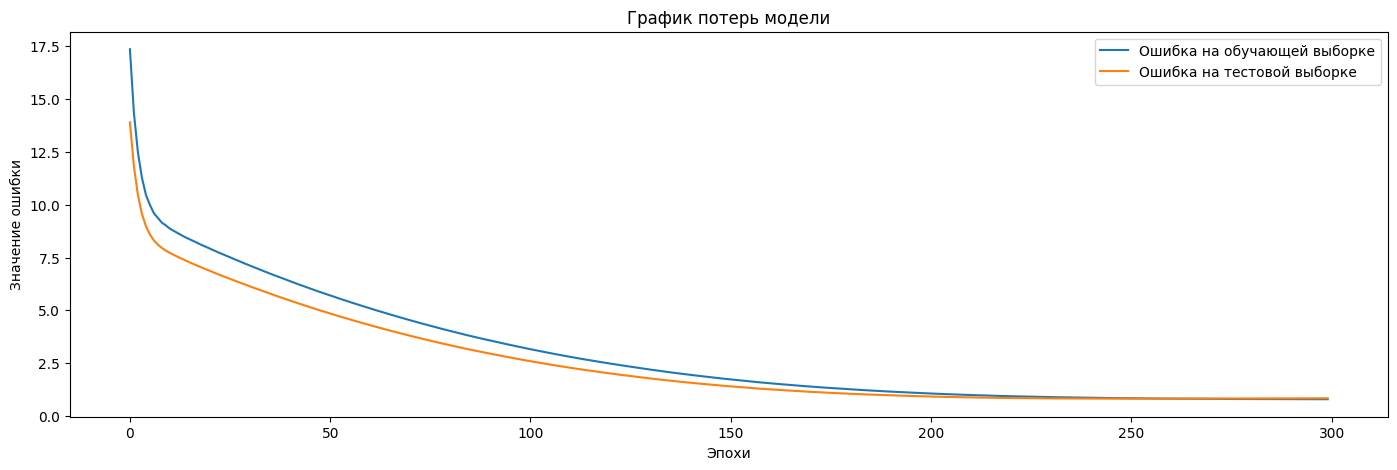

In [86]:
model_loss_plot(model_hist2)

9/9 [==============================] - 0s 2ms/step


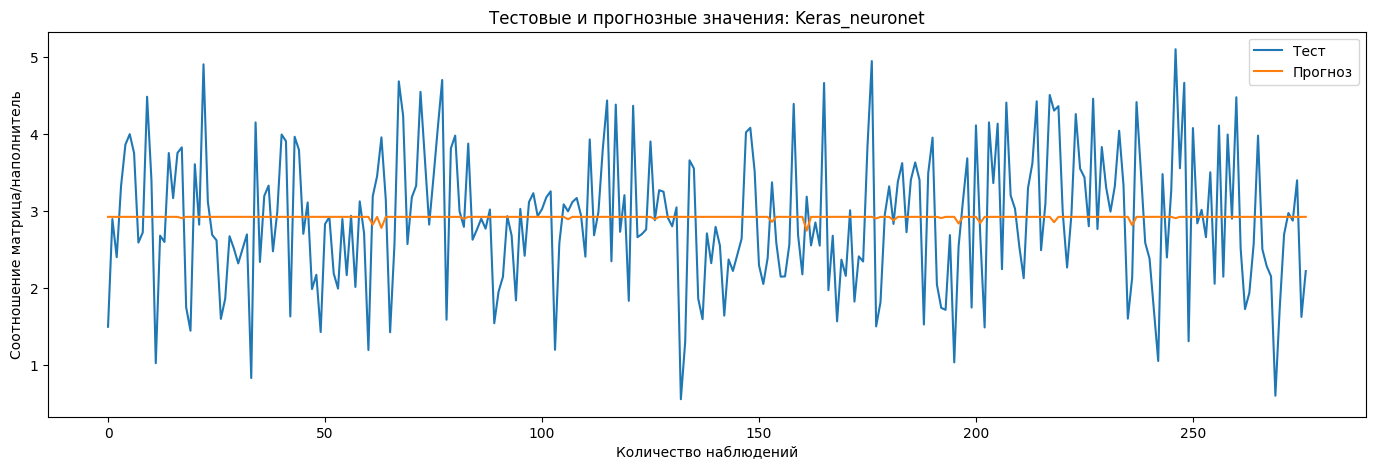

In [87]:
actual_and_predicted_plot(y_test.values, model2.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'Keras_neuronet')

In [88]:
# оценка модели MSE
model2.evaluate(x_test, y_test, verbose = 1)

9/9 [==============================] - 0s 2ms/step - loss: 0.7872 - root_mean_squared_error: 0.8872


[0.7871553897857666, 0.8872177600860596]

9/9 [==============================] - 0s 1ms/step


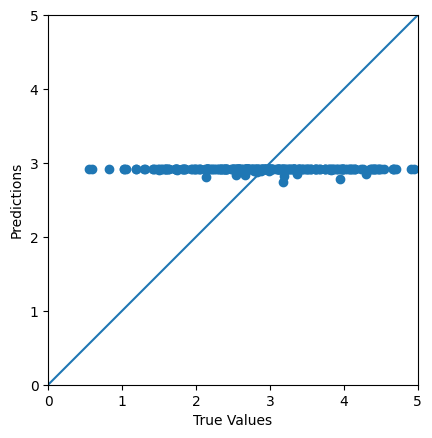

In [89]:
test_predictions = model2.predict(x_test).flatten()

a = plt.axes(aspect = 'equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

### Сохраняем необходимую модель

In [90]:
model.save(current_dir + r"/App/saved_models/model/")
model1.save(current_dir + r"/App/saved_models/model1/")
model2.save(current_dir + r"/App/saved_models/model2/")

FailedPreconditionError: C:\Users\komma\datascientist\ВКР/App/saved_models/model/variables is not a directory

# Заключение.
Подводя итоги, стоит сказать, что машинное обучение в задачах моделей прогнозирования  – довольно сложный процесс, требующий не только навыков программирования, но и профессионального подхода к сфере самих композитных материалов. 
Необходимо понимать, на какие атрибуты нужно в первую очередь обратить внимание, чтобы суметь впоследствии грамотно и чётко спрогнозировать тот или иной признак. И, естественно, обладать всеми необходимыми знаниями, умениями и навыками для прогнозов и расчетов. 
В ходе работы был задействован дата-сет с реальными данными, произведена его подробная опись и сопутствующий анализ; построено множество разнообразных графиков; осуществлено разбиение данных на обучающую и тестовую выборки с использованием множества вспомогательных модулей из библиотеки SkLearn, которая во многом облегчила процесс машинного обучения и в целом была очень полезным инструментом в ходе работы над выпускной квалификационной работой. 
В рамках машинного обучения и поиска гиперпараметров были задействованы несколько алгоритмов: линейная регрессия, градиентный бустинг, К ближайших соседей,  деревья решений, стохастический градиентный спуск, многослойный перцептрон, лассо регрессия, а также опорные вектора и случайный лес. 
Поиск гиперпараметров осуществлялся при помощи таких методов, как «GridSearch». Для каждой из выборок были составлены классификационные отчёты, содержащие в себе основополагающие метрики, оценивающие качество проводимого обучения. 
В конечном итоге было представлено сравнение результатов оценок работы алгоритмов, а также различные графики и диаграммы, позволяющие наглядно оценить итоги проведенного обучения. 
Обучена нейронная сеть и разработано пользовательское приложение, предсказывающе вероятный прогноз по заданным параметрам. 
Что касается перспектив решения данной проблемы композитных материалов, то я думаю, что в таких случаях необходимо уделить больше внимания изучению самой проблемы композитных материалов, углубить знания по статистике и регрессиям, поискать иные варианты решений с данным датасетом, создать плодтворную команду программистов и сотрудников, работающих с природными материалами, способную к совместной работе над усовершенствованием уже существующих разработок и поддержанием их качественного и бесперебойного функционирования.